# 1. LOAD THE DATASET

In [1]:
# Import the required libraries
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Step 1: Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [2]:
# Print the shape of the datasets
print(f"Training data shape: {x_train.shape}")
print(f"Test data shape: {x_test.shape}")

Training data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)


# 2. PREPROCESS THE DATASET

In [3]:
# Reshape the data to fit the model (28x28 images with 1 channel)
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))

In [4]:
# Normalize pixel values between 0 and 1
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [5]:
# Convert labels to one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# 3. TRAIN THE MODEL

In [6]:
def inception_module(x, filters_1x1, filters_3x3_reduce, filters_3x3, filters_5x5_reduce, filters_5x5, filters_pool_proj):
    conv_1x1 = layers.Conv2D(filters_1x1, (1, 1), padding='same', activation='relu')(x)

    conv_3x3 = layers.Conv2D(filters_3x3_reduce, (1, 1), padding='same', activation='relu')(x)
    conv_3x3 = layers.Conv2D(filters_3x3, (3, 3), padding='same', activation='relu')(conv_3x3)

    conv_5x5 = layers.Conv2D(filters_5x5_reduce, (1, 1), padding='same', activation='relu')(x)
    conv_5x5 = layers.Conv2D(filters_5x5, (5, 5), padding='same', activation='relu')(conv_5x5)

    pool_proj = layers.MaxPooling2D((3, 3), strides=(1, 1), padding='same')(x)
    pool_proj = layers.Conv2D(filters_pool_proj, (1, 1), padding='same', activation='relu')(pool_proj)

    output = layers.concatenate([conv_1x1, conv_3x3, conv_5x5, pool_proj], axis=-1)
    return output

def simple_googlenet(input_shape):
    input_layer = layers.Input(shape=input_shape)

    # Initial convolution and pooling
    x = layers.Conv2D(32, (3, 3), padding='same', activation='relu')(input_layer)
    x = layers.MaxPooling2D((2, 2))(x)

    # Inception modules
    x = inception_module(x, 64, 96, 128, 16, 32, 32)
    x = inception_module(x, 128, 128, 192, 32, 96, 64)

    # Pooling and Flatten
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Flatten()(x)

    # Fully connected layer
    x = layers.Dense(128, activation='relu')(x)
    output_layer = layers.Dense(10, activation='softmax')(x)

    model = models.Model(input_layer, output_layer)
    return model

# Compile the model
model = simple_googlenet((28, 28, 1))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])



In [7]:
# Step 5: Train the model
history = model.fit(x_train, y_train, epochs=5, batch_size=128, validation_split=0.2)

Epoch 1/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 30s 43ms/step - accuracy: 0.8643 - loss: 0.4273 - val_accuracy: 0.9884 - val_loss: 0.0408
Epoch 2/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - accuracy: 0.9869 - loss: 0.0383 - val_accuracy: 0.9868 - val_loss: 0.0404
Epoch 3/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 20s 30ms/step - accuracy: 0.9927 - loss: 0.0239 - val_accuracy: 0.9912 - val_loss: 0.0302
Epoch 4/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 21s 31ms/step - accuracy: 0.9947 - loss: 0.0157 - val_accuracy: 0.9887 - val_loss: 0.0389
Epoch 5/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - accuracy: 0.9946 - loss: 0.0156 - val_accuracy: 0.9912 - val_loss: 0.0338


In [8]:
# Print the model summary
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 28, 28, 1)      │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 28, 28, 32)     │            320 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d             │ (None, 14, 14, 32)     │              0 │ conv2d[0][0]           │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 14, 14, 96)     │          3,168 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_4 (Conv2D)         │ (None, 14, 14, 16)     │            528 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_1           │ (None, 14, 14, 32)     │              0 │ max_pooling2d[0][0]    │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 14, 14, 64)     │          2,112 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, 14, 14, 128)    │        110,720 │ conv2d_2[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_5 (Conv2D)         │ (None, 14, 14, 32)     │         12,832 │ conv2d_4[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_6 (Conv2D)         │ (None, 14, 14, 32)     │          1,056 │ max_pooling2d_1[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate (Concatenate) │ (None, 14, 14, 256)    │              0 │ conv2d_1[0][0],        │
│                           │                        │                │ conv2d_3[0][0],        │
│                           │                        │                │ conv2d_5[0][0],        │
│                           │                        │                │ conv2d_6[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_8 (Conv2D)         │ (None, 14, 14, 128)    │         32,896 │ concatenate[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_10 (Conv2D)        │ (None, 14, 14, 32)     │          8,224 │ concatenate[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_2           │ (None, 14, 14, 256)    │              0 │ concatenate[0][0]      │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_7 (Conv2D)         │ (None, 14, 14, 128)    │         32,896 │ concatenate[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_9 (Conv2D)         │ (None, 14, 14, 192)    │        221,376 │ conv2d_8[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_11 (Conv2D)   

 Total params: 10,594,352 (40.41 MB)

 Trainable params: 3,531,450 (13.47 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 7,062,902 (26.94 MB)

# 4. TEST THE MODEL

In [9]:
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc * 100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9914 - loss: 0.0247
Test accuracy: 99.23%


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


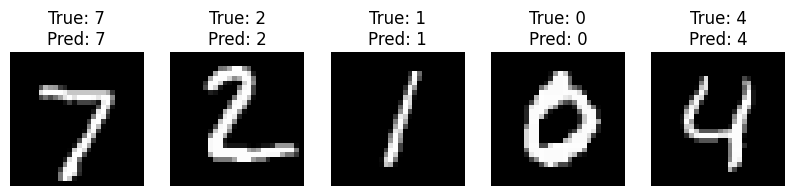

In [10]:
# IMPORT THE REQUIRED LIBRARIES
import matplotlib.pyplot as plt
import numpy as np

# Visualize some predictions
def plot_predictions(X, y_true, y_pred, num=5):
    plt.figure(figsize=(10, 5))
    for i in range(num):
        plt.subplot(1, num, i + 1)
        plt.imshow(X[i].reshape(28, 28), cmap='gray')
        plt.title(f"True: {np.argmax(y_true[i])}\nPred: {np.argmax(y_pred[i])}")
        plt.axis('off')
    plt.show()

# Get predictions for the first 5 test samples
y_pred = model.predict(x_test[:5])

# Plot predictions for the first 5 test images
plot_predictions(x_test[:5], y_test[:5], y_pred)